In [1]:
#!pip install wordcloud
#!pip install nltk

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import string 
import spacy 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
Elon = pd.read_csv('Elon_musk.csv',
                   encoding='latin',
                   error_bad_lines = False)
Elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
Elon=Elon['Text']
Elon

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [5]:
Elon = [y.strip() for y in Elon]
Elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
Elon = [x for x in Elon if x] 
Elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
Elon1=''.join(Elon)
Elon1

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [8]:
Elon2 = Elon1.translate(str.maketrans("\x92", "'", string.punctuation)) 
Elon2

"kunalb11 I'm an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It's getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet t

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
Elon3 = word_tokenize(Elon2)
Elon3

['kunalb11',
 'I',
 "'m",
 'an',
 'alienIDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'itjoerogan',
 'Spotify',
 'Great',
 'interviewgtera27',
 'Doge',
 'is',
 'underestimatedteslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'moreHappy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2ojFrodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrMOwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocationThe',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likelyGiveDirectly',
 'Just',
 'sent',
 'someJust',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'kanyewesthttpstco3rWE9uH

In [11]:
Elon3[0:65]

['kunalb11',
 'I',
 "'m",
 'an',
 'alienIDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'itjoerogan',
 'Spotify',
 'Great',
 'interviewgtera27',
 'Doge',
 'is',
 'underestimatedteslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'moreHappy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2ojFrodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrMOwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed']

In [12]:
len(Elon3)

19390

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
stop_tokens = [word for word in Elon3 if not word in stop_words]
print(stop_tokens[0:70])

['kunalb11', 'I', "'m", 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'kanyewesthttpstco3rWE9uHSTSgeoffkeighley', 'UnrealEngine', 'It', "'s", 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler']


In [16]:
lower_words = [x.lower() for x in stop_tokens]
print(lower_words[0:35])

['kunalb11', 'i', "'m", 'alienidaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'morehappy', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdoge', 'all', 'thought']


In [17]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:60])

['kunalb11', 'i', "'m", 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'allocationth', 'entertain', 'outcom', 'likelygivedirectli', 'just', 'sent', 'somejust', 'agre', 'clubhous']


In [18]:
#!python -m spacy download en_core_web_sm

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
doc = nlp(' '.join(stop_tokens))
print(doc[0:60])

kunalb11 I 'm alienIDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried itjoerogan Spotify Great interviewgtera27 Doge underestimatedteslacn Congratulations Tesla China amazing execution last year Now next even moreHappy New Year Ox httpstco9WFKMYu2ojFrodo underdoge All thought would fail Himself httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocationThe entertaining outcome likelyGiveDirectly Just sent someJust agree


In [21]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['kunalb11', 'I', "'", 'm', 'alienidaacarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark']


### Feature Extraction 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [23]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alienidaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,itjoerogan,...,surreal,propaganda,social,httpstcowjrzibkh1hppathole,click,acceptteslagong,samwise,gamgeeppathole,altho,u0001f525u0001f525progress
0,2867,248,3876,4871,1013,1848,3368,1844,4935,2755,...,4583,3802,4325,2482,798,159,4092,1657,266,5026


In [24]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
kunalb11,2867
alienidaacarmack,248
ray,3876
trace,4871
cyberpunk,1013
...,...
acceptteslagong,159
samwise,4092
gamgeeppathole,1657
altho,266


In [25]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

,0
ðogecoin,5538
zzcool,5537
zonrt,5536
zone,5535
zogfotpik,5534
zip2,5533
zerotrungtphan,5532
zerocerberu21014829,5531
zero,5530
zenit,5529


In [26]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
005,0
10,1
100,2
1000,3
10000,4
107,5
10x,6
11,7
112charliemunger00,8
11erdayastronaut,9


In [27]:
print(vectorizer.vocabulary_)

{'kunalb11': 2867, 'alienidaacarmack': 248, 'ray': 3876, 'trace': 4871, 'cyberpunk': 1013, 'hdr': 1848, 'nextlevel': 3368, 'have': 1844, 'try': 4935, 'itjoerogan': 2755, 'spotify': 4425, 'great': 1745, 'interviewgtera27': 2723, 'doge': 1173, 'underestimatedteslacn': 5135, 'congratulations': 889, 'tesla': 4676, 'china': 771, 'amazing': 276, 'execution': 1419, 'last': 2888, 'year': 5448, 'now': 3414, 'next': 3367, 'even': 1372, 'morehappy': 3267, 'new': 3365, 'ox': 3545, 'httpstco9wfkmyu2ojfrodo': 2035, 'underdoge': 5134, 'all': 251, 'thought': 4765, 'would': 5411, 'fail': 1457, 'himself': 1894, 'httpstcozgxjfdzzrmowenspark': 2549, 'flcnhvy': 1544, 'anonyx10': 306, 'haha': 1786, 'thank': 4716, 'indeed': 2647, 'tweets': 4959, 'definitely': 1070, 'represent': 3960, 'realworld': 3904, 'time': 4787, 'allocationthe': 255, 'entertaining': 1327, 'outcome': 3519, 'likelygivedirectly': 2957, 'just': 2819, 'send': 4162, 'somejust': 4337, 'agree': 217, 'clubhouse': 807, 'kanyewesthttpstco3rwe9uhsts

In [28]:
print(vectorizer.get_feature_names()[50:200])

['218', '21st', '22', '225', '23', '230', '24', '240am', '25', '250', '250kw', '25d', '25gunsteslacomchadhurley', '25k', '25th', '28', '28ai', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3brianheide', '3d', '3rd', '40', '400', '4227', '42u0001f917rt', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '50', '50000', '50k', '5ercxspace', '60', '60000', '65', '69420', '6f', '6ki', '727', '727pm', '74', '74httpstco1mqxfakpzfi', '78', '7th', '90', '9007mmmarlonsix60', '922', '948', '95', '99', '9httpstcomdopo17yb9', '9inety6prince', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'aboutstephenpallotta', 'above', 'absence', 'absolute', 'absolutely', 'absolutelyajtourville', 'absolutelyhey', 'absolutelynasaspaceflight', 'absolutelyteslaparatodo', 'absolutelytesmaniancom', 'absolutelywhat', 'absorb', 'absorption', 'absurd', 'absurdly', 'absurdtesmaniancom', 

In [29]:
print(X.toarray()[50:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(X.toarray().shape)

(14106, 5539)


In [31]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,6),
                                         max_features = 200)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(Elon)
bow_matrix_ngram

<1999x200 sparse matrix of type '<class 'numpy.int64'>'
	with 11729 stored elements in Compressed Sparse Row format>

In [32]:
print(vectorizer_ngram_range.get_feature_names())

['0001f525', '0001f923', '0001f923 0001f923', 'about', 'actually', 'ai', 'ajtourville', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'austinbarnard45', 'back', 'be', 'berniesanders', 'best', 'better', 'booster', 'but', 'by', 'can', 'car', 'cleantechnica', 'co', 'coming', 'cool', 'could', 'crew', 'day', 'do', 'don', 'down', 'dragon', 'earth', 'engine', 'engineering', 'engineers_feed', 'engines', 'ercxspace', 'erdayastronaut', 'erdayastronaut spacex', 'evafoxu', 'even', 'ever', 'exactly', 'falcon', 'fe0f', 'felixschlang', 'few', 'first', 'flcnhvy', 'flight', 'for', 'from', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'has', 'have', 'he', 'high', 'https', 'https co', 'icannot_enough', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'is the', 'it', 'it will', 'just', 'kristennetten', 'landing', 'launch', 'lexfridman', 'life', 'like', 'long', 'lot', 'lot of', 'make', 'many', 'marcushousegame', 'mars', 'maybe', 'me', 'mission', 'model', 'more', 'most', 'much', 'my', '

In [33]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFidf vectorizer 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="",
                                                 analyzer='word',
                                                 ngram_range=(1,6),
                                                 max_features = 200)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(Elon)

In [35]:
print(vectorizer_n_gram_max_features.get_feature_names())

['0001f525', '0001f923', '0001f923 0001f923', 'about', 'actually', 'ai', 'ajtourville', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'austinbarnard45', 'back', 'be', 'berniesanders', 'best', 'better', 'booster', 'but', 'by', 'can', 'car', 'cleantechnica', 'co', 'coming', 'cool', 'could', 'crew', 'day', 'do', 'don', 'down', 'dragon', 'earth', 'engine', 'engineering', 'engineers_feed', 'engines', 'ercxspace', 'erdayastronaut', 'erdayastronaut spacex', 'evafoxu', 'even', 'ever', 'exactly', 'falcon', 'fe0f', 'felixschlang', 'few', 'first', 'flcnhvy', 'flight', 'for', 'from', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'has', 'have', 'he', 'high', 'https', 'https co', 'icannot_enough', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'is the', 'it', 'it will', 'just', 'kristennetten', 'landing', 'launch', 'lexfridman', 'life', 'like', 'long', 'lot', 'lot of', 'make', 'many', 'marcushousegame', 'mars', 'maybe', 'me', 'mission', 'model', 'more', 'most', 'much', 'my', '

In [36]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          4.07911388
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [12.59663473  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


####  Generate wordcloud 

In [37]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    
    plt.imshow(wordcloud)           
    plt.axis("off")                 

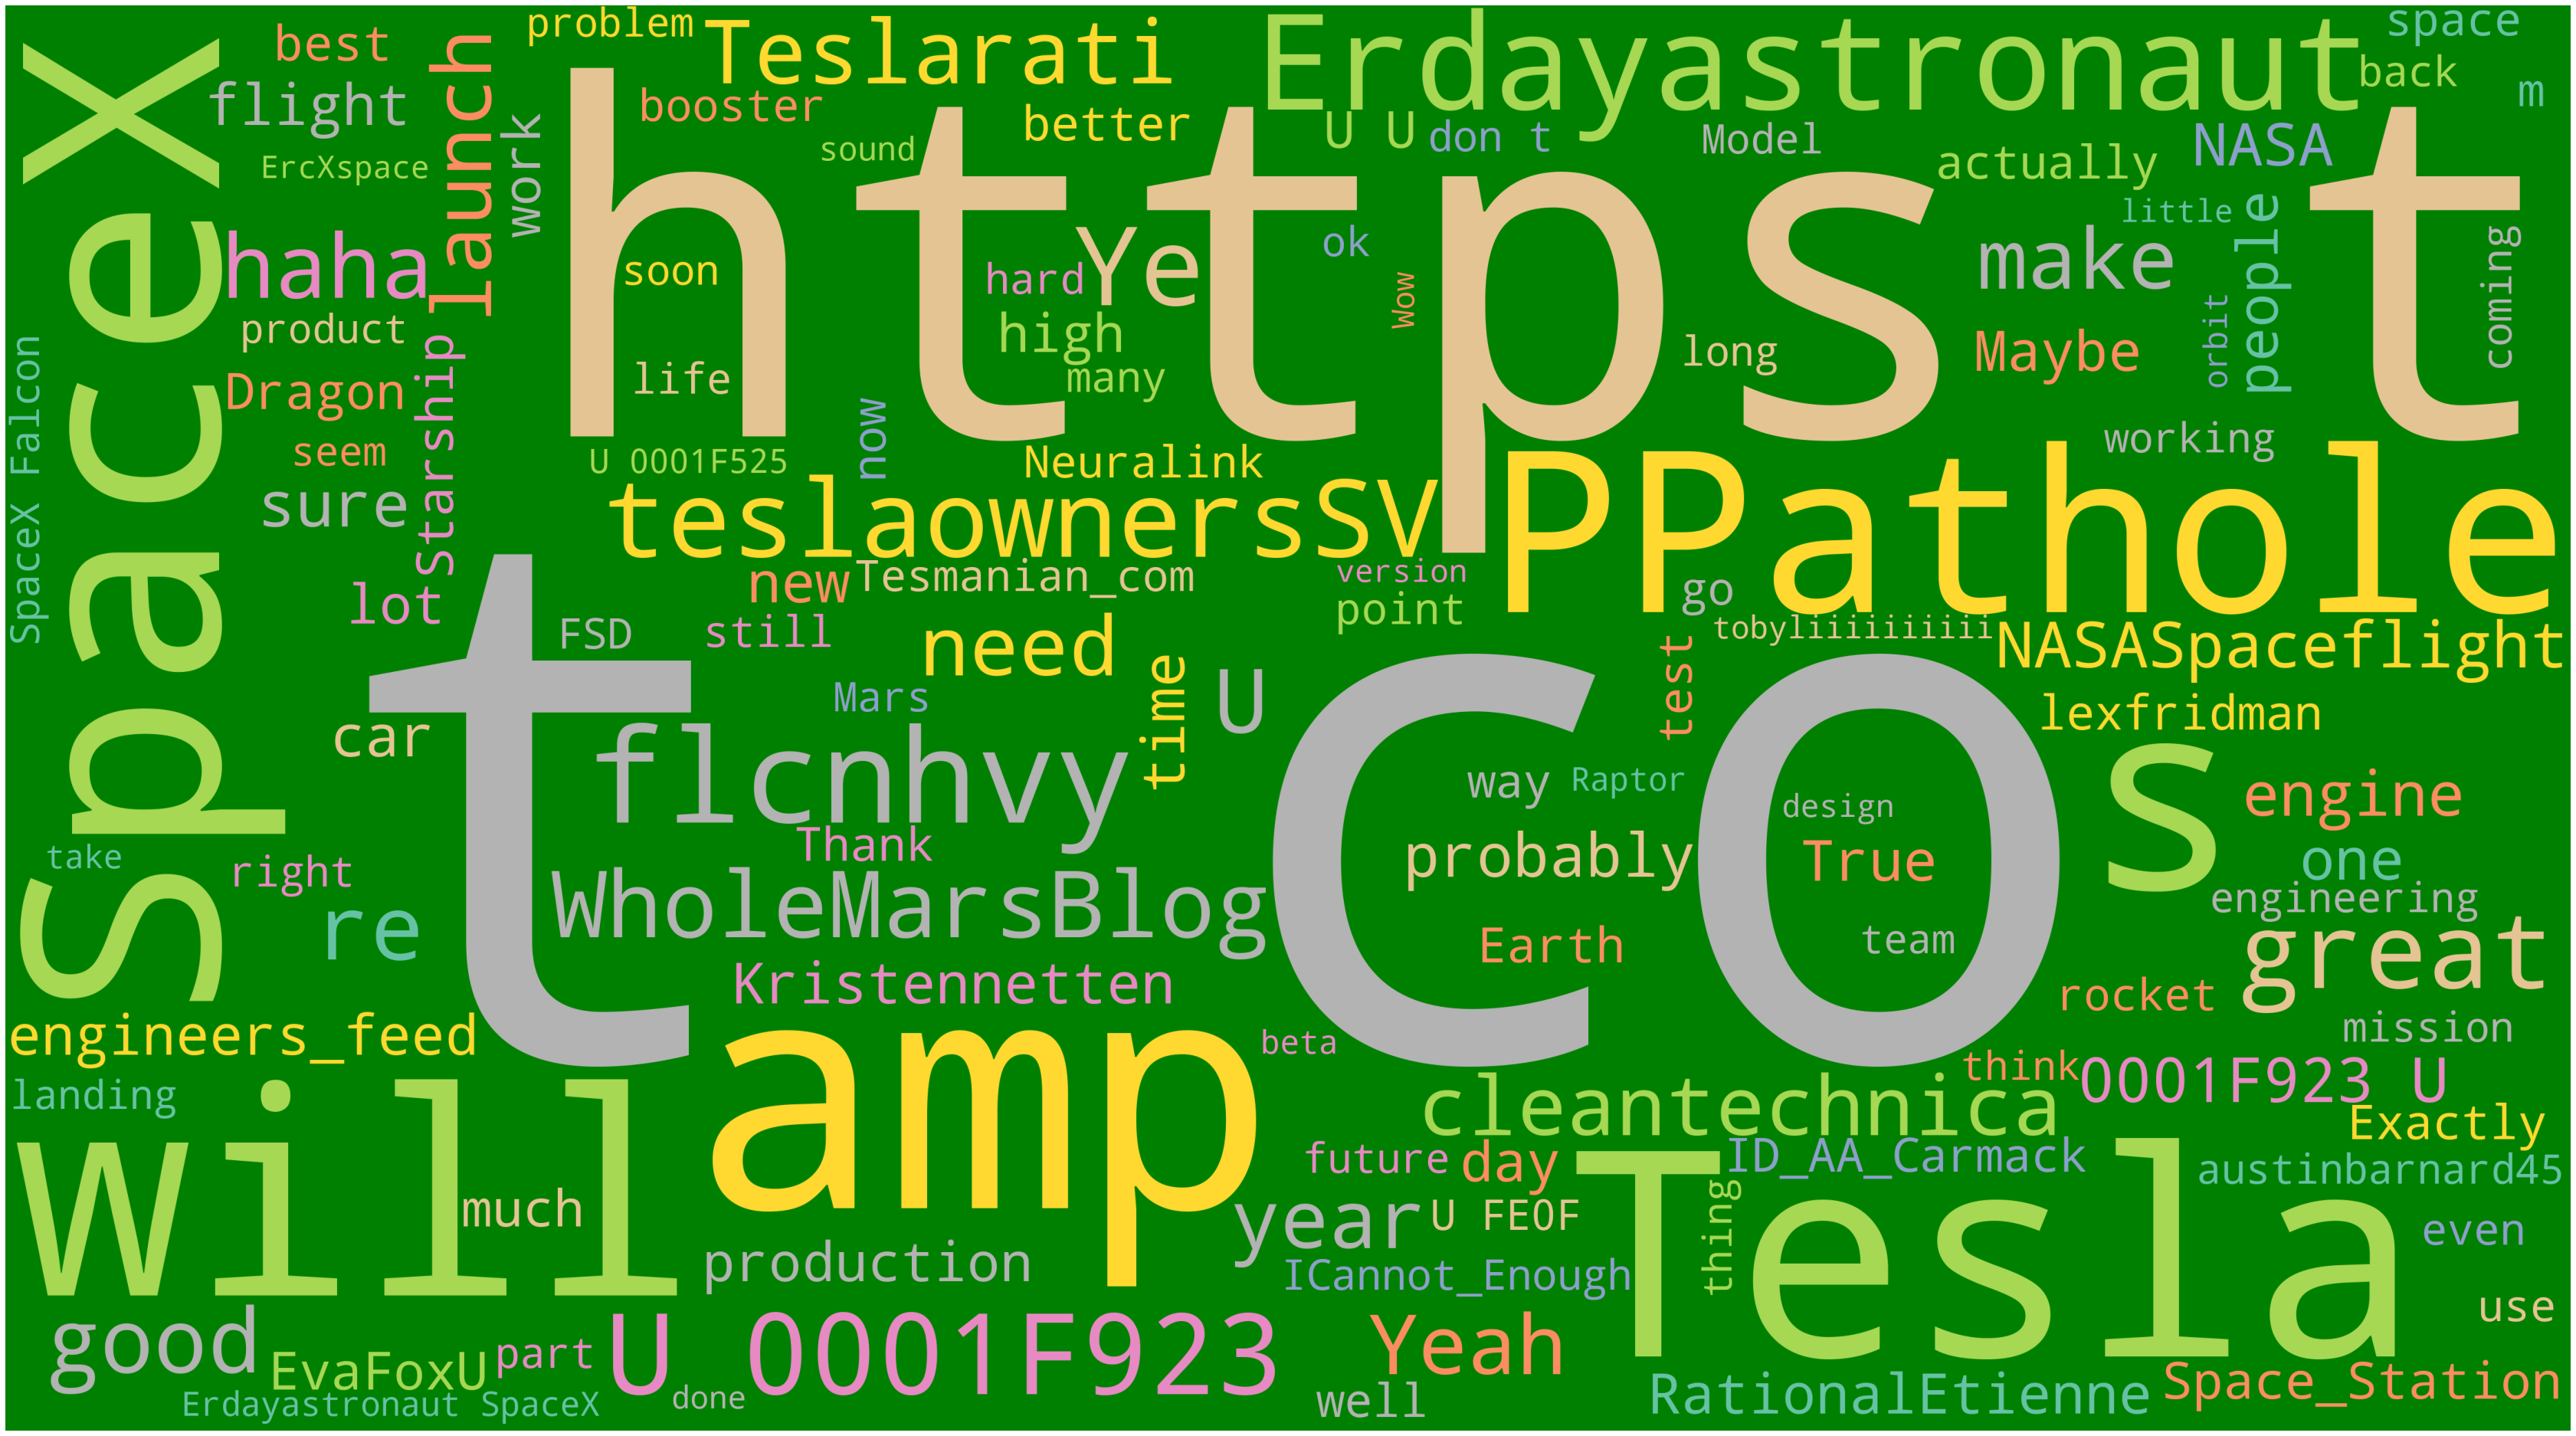

In [41]:
wordcloud = WordCloud(width = 4500, 
                      height = 2500,
                      background_color='green',
                      max_words=120,
 
                      colormap='Set2').generate(Elon1)

plot_cloud(wordcloud)

In [39]:
musk = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [40]:
musk = musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [44]:
musk = [x.strip() for x in musk] 
musk = [x for x in musk if x] 
musk[0:15]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler']

In [45]:
one_block = musk[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [46]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [47]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [48]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

['tracing', 'level', 'tried']

In [49]:
len(nouns_verbs)

3

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [51]:
X.shape

(3, 3)

In [52]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [53]:
cv.get_feature_names()

['level', 'tracing', 'tried']

In [54]:
df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [55]:
sum_words = X.sum(axis=0) 
sum_words

matrix([[1, 1, 1]], dtype=int64)

In [56]:
type(sum_words)

numpy.matrix

In [57]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [58]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [59]:
df1 = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
df1

,word,count
0,level,1
1,tracing,1
2,tried,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

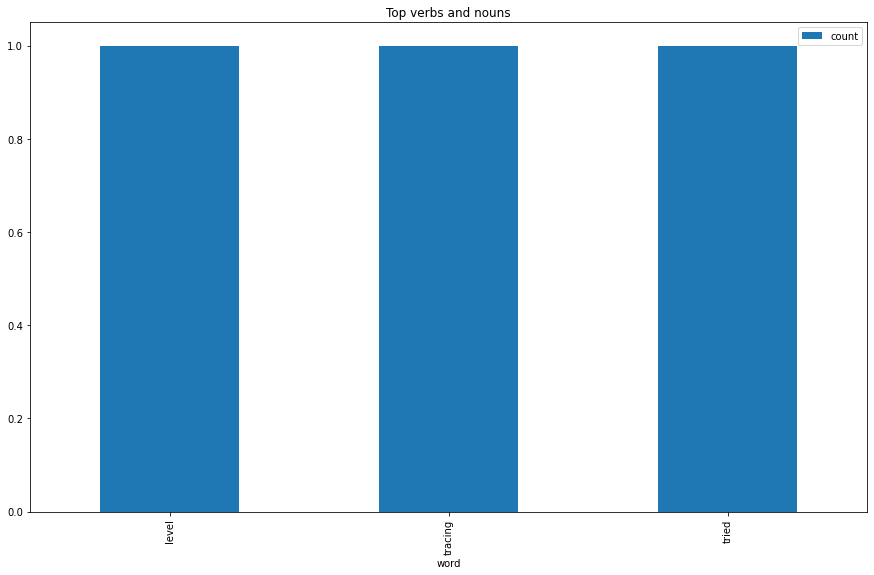

In [61]:
df1[0:20].plot.bar(x='word', figsize=(15,9), title='Top verbs and nouns')

#### Emotion Mining 

In [62]:
sd= pd.read_csv('Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')
sd

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [64]:
sd[2000:]

,word,value
2000,shamed,-2
2001,shameful,-2
2002,share,1
2003,shared,1
2004,shares,1
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [68]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(musk))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [69]:
sd_df = pd.DataFrame(sentences, columns=['sentence'])
sd_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [70]:
affinity_scores = sd.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [71]:
nlp = spacy.load('en_core_web_sm')

In [72]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [73]:
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [74]:
calculate_sentiment(text = 'wonderful session')

4

In [75]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [76]:
calculate_sentiment(text = 'good')

3

In [77]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [81]:
sd_df['sentiment_value'] = sd_df['sentence'].apply(calculate_sentiment)
sd_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [82]:
sd_df.iloc[4,0]

'Now on to the next for even more!!'

In [83]:
sd_df['word_count'] = sd_df['sentence'].str.split().apply(len)
sd_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [84]:
sd_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
159,@harsimranbansal @heydave7 It will most likely...,11,93
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",11,45
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [85]:
sd_df.sort_values(by='sentiment_value').head(20)

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
744,@TimFernholz So why is this madness acceptable...,-3,10
380,No problem if theres a way get current design...,-3,13
219,@RGVaerialphotos It will be real soon @MarcusH...,-3,18


In [86]:
sd_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [87]:
sd_df[sd_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [88]:
sd_df[sd_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61


In [89]:
sd_df[sd_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
647    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
837    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [90]:
sd_df[sd_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [91]:
sd_df[sd_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [92]:
sd_df['index'] = range(0, len(sd_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Count'>

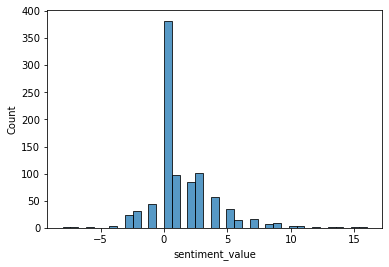

In [93]:
sns.histplot(sd_df['sentiment_value'])

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

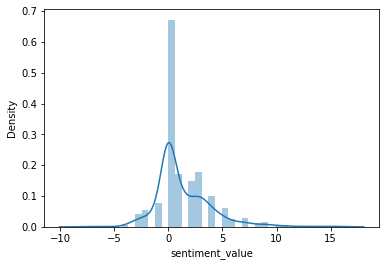

In [95]:
sns.distplot(sd_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

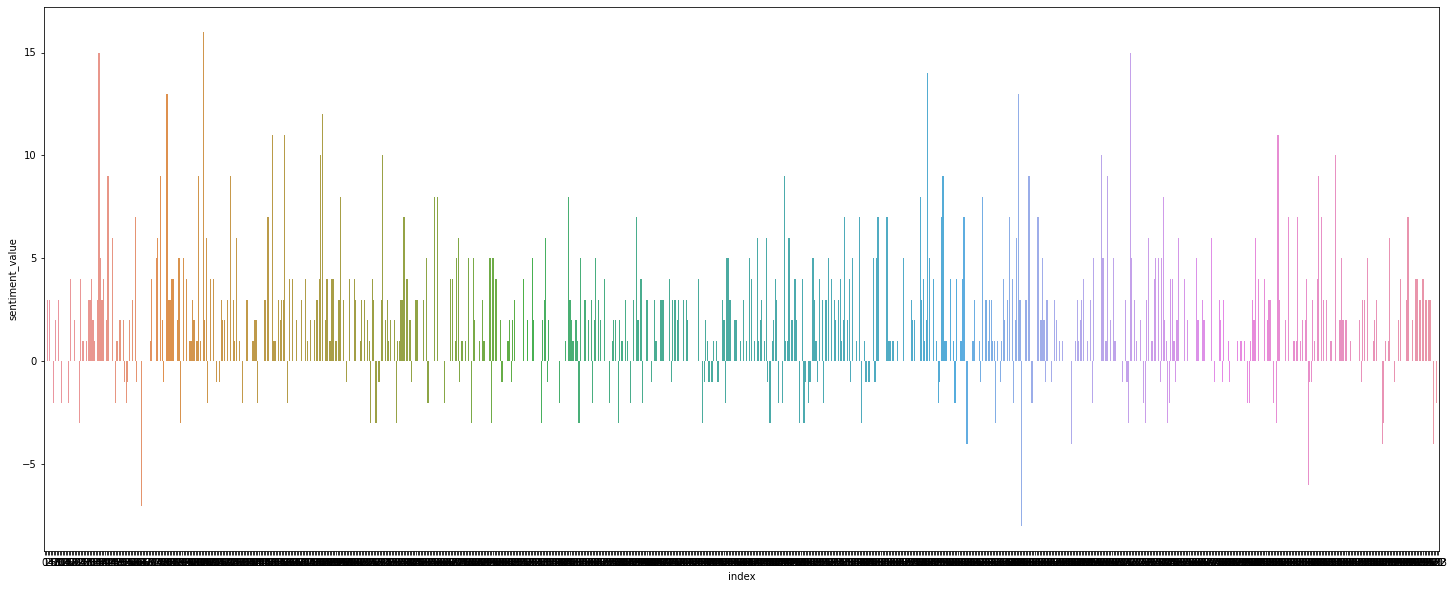

In [98]:
plt.figure(figsize=(25, 10))
sns.barplot(y='sentiment_value',x='index',data=sd_df)

<AxesSubplot:xlabel='word_count', ylabel='sentiment_value'>

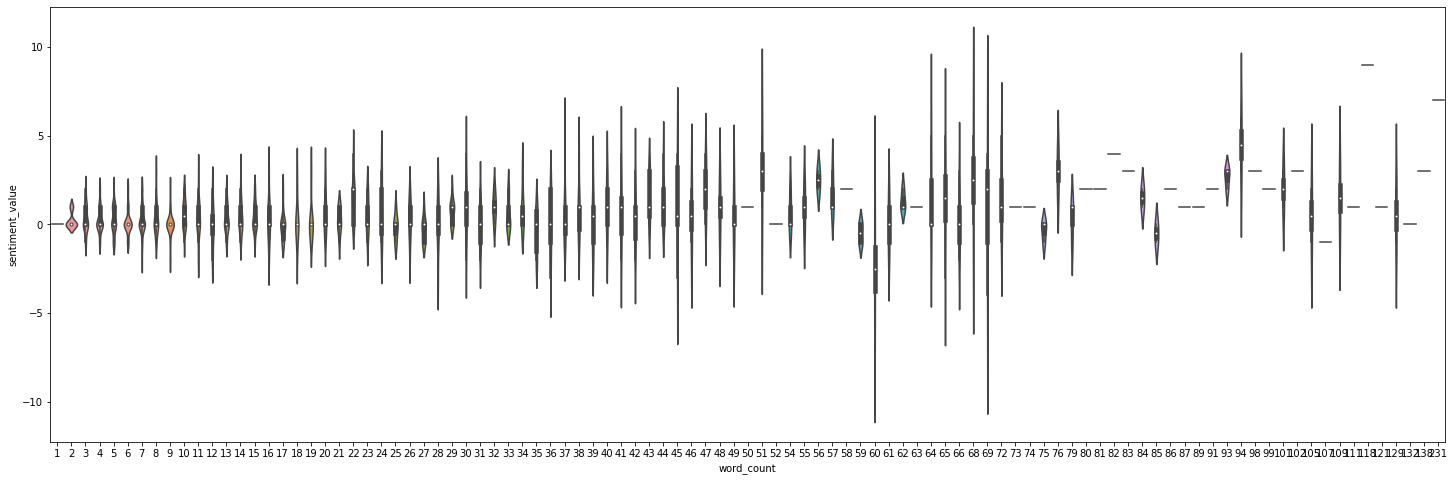

In [132]:
plt.figure(figsize = (25, 8));
sns.violinplot(x ="word_count",
             y ="sentiment_value",
             style ="event",
             data = sd_df) 

In [102]:
sd2=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
sd2

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [105]:
SW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
SW

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [106]:
sd2 =sd2.iloc[30:]
sd2 =sd2.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
sd2.reset_index(inplace=True)
sd2 =sd2.drop('index',axis=1)
sd2['Score'] = 1
sd2

,Words,Score
0,admiringly,1
1,adorable,1
2,adore,1
3,adored,1
4,adorer,1
...,...,...
1966,youthful,1
1967,zeal,1
1968,zenith,1
1969,zest,1


In [107]:
SW = SW.iloc[30:]
SW = SW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
SW.reset_index(inplace=True)
SW = SW.drop('index',axis=1)
SW['Score'] = -1
SW

,Words,Score
0,abominably,-1
1,abominate,-1
2,abomination,-1
3,abort,-1
4,aborted,-1
...,...,...
4773,zaps,-1
4774,zealot,-1
4775,zealous,-1
4776,zealously,-1


In [109]:
affinity_scores1 = sd2.set_index('Words')['Score'].to_dict()
affinity_scores2 = SW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable': 1,
 'affably': 1,
 'affectation': 1,
 'affection': 1,
 'affectionate': 1,
 'affinity': 1,
 'affirm': 1,
 'affirmation': 1,
 'affirmative': 1,
 'affluence': 1,
 'affluent': 1,
 'afford': 1,
 'affordable': 1,
 'affordably': 1,
 'afordable': 1,
 'agile': 1,
 'agilely': 1,
 'agility': 1,
 'agreeable': 1,
 'agreeableness': 1,
 'agreeably': 1,
 'all-around': 1,
 'alluring': 1,
 'alluringly': 1,
 'altruistic': 1,
 'altruistically': 1,
 'amaze': 1,
 'amazed': 1,
 'amazement': 1,
 'amazes': 1,
 'amazing': 1,
 'amazingly': 1,
 'ambitious': 1,
 'ambitiously': 1,
 'ameliorate': 1,
 'amenable': 1,
 'amenity

In [110]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
       
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [112]:
sd_df['sentiment_value'] = sd_df['sentence'].apply(calculate_sentiment)
sd_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [113]:
sd_df['word_count'] = sd_df['sentence'].str.split().apply(len)
sd_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,1,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,0,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-1,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,0,47,922


In [114]:
sd_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count,index
371,@Chad_Hurley @realDonaldTrump @kanyewest Stop ...,5,65,371
580,"T https://t.co/DyNlT5EKGk @Model3Owners Fine,...",5,37,580
105,@Erdayastronaut @SpaceX Was also thinking that...,6,94,105
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",7,231,36
652,"Its not useful for predicting the future, nor...",9,118,652


In [115]:
sd_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count,index
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60,647
886,This is primarily an electrical/electronic (ch...,-4,69,886
363,4D is essential for dynamically occluded objec...,-3,45,363
762,A full blown Starship and SuperHeavy will be h...,-3,36,762
329,"Their main PCR search is for the N1 gene, uniq...",-3,28,329


In [116]:
sd_df['sentiment_value'].describe()

count    924.000000
mean       0.442641
std        1.250768
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [118]:
sd_df[sd_df['sentiment_value']<0].head

<bound method NDFrame.head of                                               sentence  sentiment_value  \
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -1   
11   However, if we don
 https://t.co/9Z8Ac6skqx @R...               -1   
16                         Thats what youre missing.               -1   
23   https://t.co/UEEocOfcTb The people have spoken...               -1   
30   The Second Last Kingdom https://t.co/Je4EI88Hm...               -1   
..                                                 ...              ...   
899  A rocket that is single use is just as absurd ...               -1   
900  F9 e
 https://t.co/WfnFSt3C5Y @vincent13031925...               -1   
901        @SpaceflightNow Were being extra paranoid.               -1   
906  Extreme
 https://t.co/fs0PmcIoic @jgrano305 @T...               -1   
920  It may never pay out, as the stock cant b
 ht...               -1   

     word_count  index  
6            14      6  
11           40    

In [119]:
sd_df[sd_df['sentiment_value']<-1]

,sentence,sentiment_value,word_count,index
55,You https://t.co/6gO7EHq9qy @avalonpenrose A ...,-2,30,55
64,"Also, the road to hell is mostly paved with ba...",-2,11,64
67,Only o https://t.co/CeoFLi8Lzm @Megaconstella...,-2,39,67
156,We couldnt get everything done in https://t....,-3,65,156
200,Fuel header tank pressure was low during landi...,-2,35,200
219,@RGVaerialphotos It will be real soon @MarcusH...,-2,18,219
220,External https://t.co/csIZk6sEVu @bcart03 @ne...,-2,31,220
240,@RationalEtienne @ShyCybertruck Fate loves iro...,-2,42,240
296,"No symptoms for past few days, apart from fati...",-2,9,296
304,"Last week, I had sym https://t.co/gL0mhrqJxY ...",-2,41,304


In [120]:
sd_df[sd_df['sentiment_value']<-1].head(20)['sentence']

55     You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
64     Also, the road to hell is mostly paved with ba...
67     Only o
 https://t.co/CeoFLi8Lzm @Megaconstella...
156    We couldnt get everything done in
 https://t....
200    Fuel header tank pressure was low during landi...
219    @RGVaerialphotos It will be real soon @MarcusH...
220    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
240    @RationalEtienne @ShyCybertruck Fate loves iro...
296    No symptoms for past few days, apart from fati...
304    Last week, I had sym
 https://t.co/gL0mhrqJxY ...
322    @slashdot Feels that way @WhatsupFranks @bluem...
329    Their main PCR search is for the N1 gene, uniq...
363    4D is essential for dynamically occluded objec...
374    The Model 3 ramp was extreme stress &amp; pa
 ...
391    Transferring propellant
 https://t.co/vPIIPpDV...
436    @SpaceX Just a small-seeming issue with loss o...
446    We also have to consider population life-month...
525    Hollywood should just st

In [121]:
sd_df[sd_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['You\x85 https://t.co/6gO7EHq9qy @avalonpenrose A hedge fund that shorts is a shrubbery @lafebra @Gfilche https://t.co/M0WwQSTAXm @lafebra @Gfilche Yeah, also a rear screen 0 to 155mph trap speed in a 1/4 mile.',
 'Also, the road to hell is mostly paved with bad intentions.',
 'Only o\x85 https://t.co/CeoFLi8Lzm @Megaconstellati @Aviation_Intel @jetcitystar @larrypress Yup @TeslaGong @teslaownersSV @cleantechnica I hope so @Tesmanian_com These also have laser links between the satellites, so no ground stations are needed over the poles @teslaownersSV @cleantechnica Sorry for the version confusion.',
 'We couldn\x92t get everything done in\x85 https://t.co/7HkZA1OhE4 @westcoastbill The writing on Cobra Kai is sick<U+0001F44C> @AfloatHickory Haha I will save you the nightmare of seeing me in those shorts @h3_extrachars You can upload custom music/sounds @jgrano305 Unfortunately, pedestrian speaker is needed, otherwise no external sound generator except actual horn Change your horn sound

In [122]:
sd_df['index'] = range(0, len(sd_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

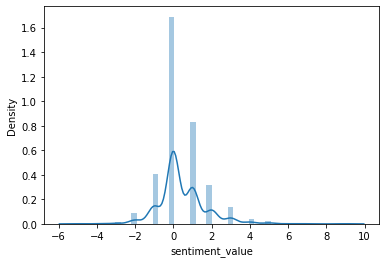

In [123]:
sns.distplot(sd_df['sentiment_value'])

<AxesSubplot:xlabel='sentiment_value'>

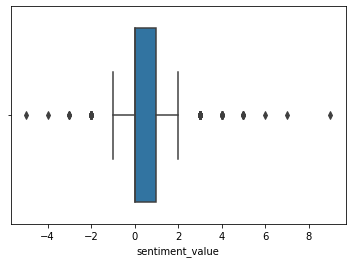

In [126]:
sns.boxplot(sd_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

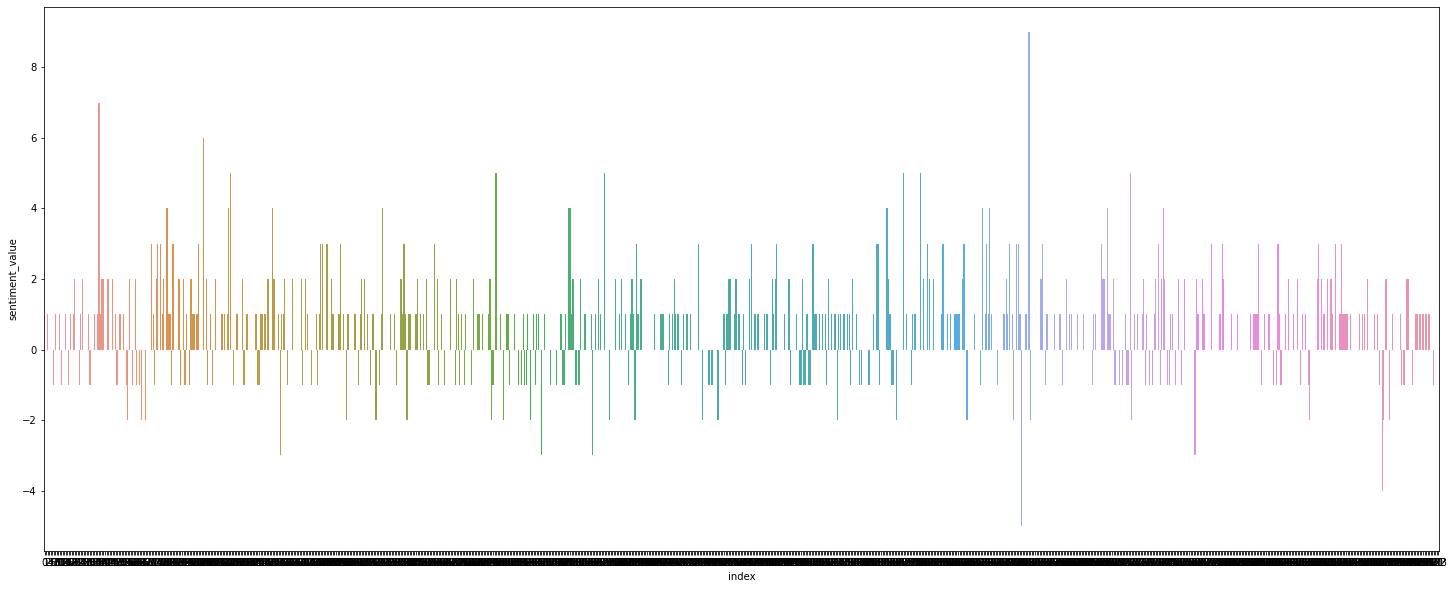

In [129]:
plt.figure(figsize=(25, 10))
sns.barplot(y='sentiment_value',x='index',data=sd_df)

<AxesSubplot:xlabel='word_count', ylabel='sentiment_value'>

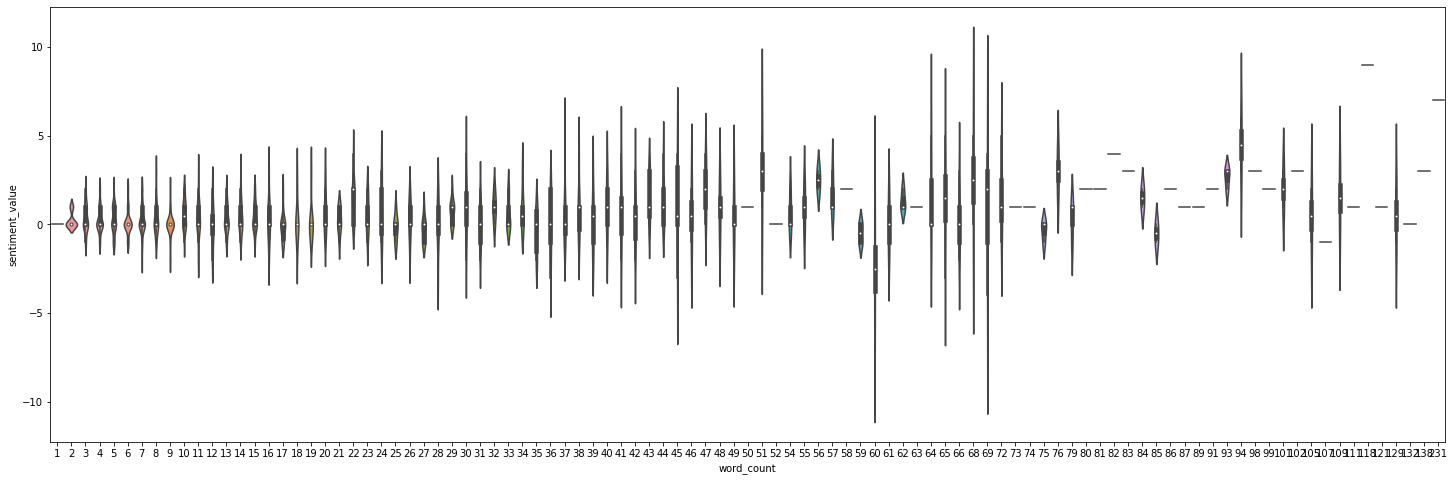

In [131]:
plt.figure(figsize = (25, 8));
sns.violinplot(x ="word_count",
             y ="sentiment_value",
             style ="event",
             data = sd_df)

## Afinn dataset  gives us better analysis.